In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import SimpleRNN, LSTM, GRU
from keras.optimizers import SGD, Nadam, Adam, RMSprop
from keras.callbacks import TensorBoard
from keras.utils import np_utils
import matplotlib.pyplot as plt 
import scipy.io 
import numpy as np



In [3]:
data = scipy.io.loadmat('../data/sp1s_aa_1000Hz.mat')



(500, 28, 316)


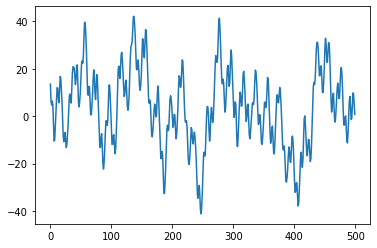

In [20]:
x_train = data['x_train']
print(x_train.shape)
plt.plot(x_train[:,1,7])

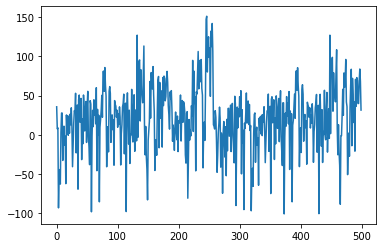

In [69]:
#x_train = data['x_train'].reshape(316,500,28)
#plot = plt.plot(x_train[1,:,1])

(316, 28, 500)
(316, 500, 28)


"\ntmp_train = []\nfor i in y_train:\n    if i == 1:\n        tmp_train.append(1)\n    elif i == 0:\n        tmp_train.append(-1)\ny_train = np.array(tmp_train)\ny_train = np_utils.to_categorical(y_train, 2)\ny_train = y_train.astype('float32')\nprint(y_train)\n"

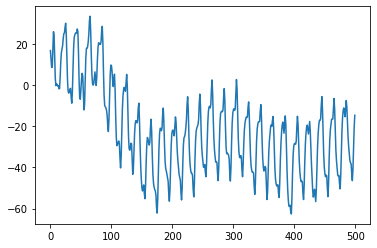

In [75]:

#x_train = data['x_train'].reshape(316,500,28)
x_train = data['x_train'].swapaxes(0,2)
print(x_train.shape)
x_train =x_train.swapaxes(1,2)


x_train = x_train.astype('float32')
plot = plt.plot(x_train[1,:,1])
print(x_train.shape)
y_train = data['y_train'].reshape(316,1)
y_train = y_train.astype('float32')

"""
tmp_train = []
for i in y_train:
    if i == 1:
        tmp_train.append(1)
    elif i == 0:
        tmp_train.append(-1)
y_train = np.array(tmp_train)
y_train = np_utils.to_categorical(y_train, 2)
y_train = y_train.astype('float32')
print(y_train)
"""



In [76]:
model = Sequential() 
model.add(LSTM(10,return_sequences=True,input_shape=(500,28)))
model.add(LSTM(10,return_sequences=True))
model.add(LSTM(5))
model.add(Dense(2,activation='softmax'))
model.summary()

optim = Nadam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optim,metrics = ['accuracy'])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (None, 500, 10)           1560      
_________________________________________________________________
lstm_28 (LSTM)               (None, 500, 10)           840       
_________________________________________________________________
lstm_29 (LSTM)               (None, 5)                 320       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 12        
Total params: 2,732
Trainable params: 2,732
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.fit(x_train,y_train,epochs=15,batch_size=20)

Epoch 1/15
16/16 [==============================] - 5s 155ms/step - loss: 0.6916 - accuracy: 0.5929
Epoch 2/15
16/16 [==============================] - 2s 154ms/step - loss: 0.6736 - accuracy: 0.5926
Epoch 3/15
16/16 [==============================] - 2s 154ms/step - loss: 0.6764 - accuracy: 0.5877
Epoch 4/15
16/16 [==============================] - 2s 156ms/step - loss: 0.6664 - accuracy: 0.5706
Epoch 5/15
16/16 [==============================] - 2s 153ms/step - loss: 0.6520 - accuracy: 0.6423
Epoch 6/15
16/16 [==============================] - 2s 155ms/step - loss: 0.6602 - accuracy: 0.6211
Epoch 7/15
16/16 [==============================] - 2s 154ms/step - loss: 0.6380 - accuracy: 0.6773
Epoch 8/15
16/16 [==============================] - 2s 153ms/step - loss: 0.6532 - accuracy: 0.6336
Epoch 9/15
16/16 [==============================] - 2s 153ms/step - loss: 0.6365 - accuracy: 0.6402
Epoch 10/15
16/16 [==============================] - 2s 155ms/step - loss: 0.6223 - accuracy: 0.6638